# Import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reporducibility
torch.manual_seed(1)

# Discrete Probability Distribution
이산확률분포

# Softmax
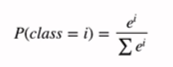

In [3]:
z=torch.FloatTensor([1,2,3])

- `softmax`

In [4]:
hypothesis=F.softmax(z,dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


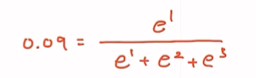

In [5]:
hypothesis.sum()

tensor(1.)

# Cross Entropy
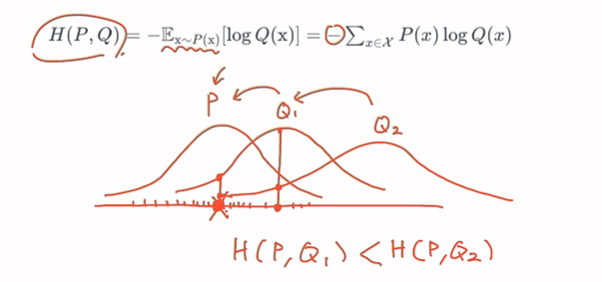

# Cross Entropy Loss(Low-level)
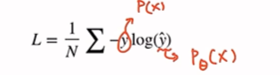

In [7]:
z=torch.rand(3, 5, requires_grad=True)
hypothesis=F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [8]:
y=torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [9]:
y_one_hot=torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

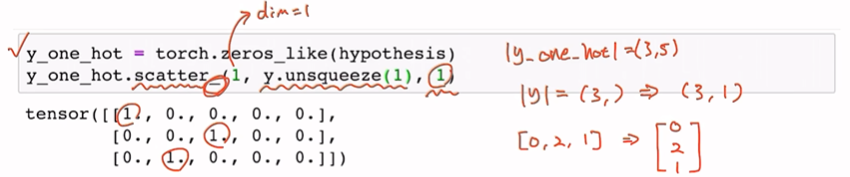

In [10]:
cost=(y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


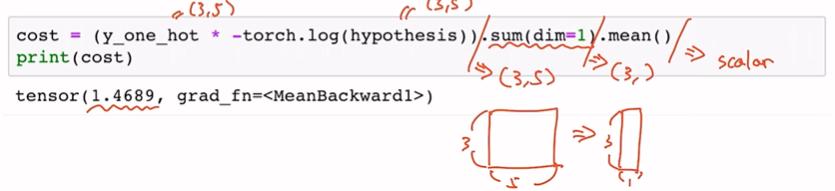

# Cross-entropy Loss with torch.nn.functional

In [11]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [12]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [13]:
# Low level
(y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [14]:
# High level
F.nll_loss(F.log_softmax(z, dim=1),y) # NLL = Negative Log Likelihood

tensor(1.4689, grad_fn=<NllLossBackward0>)

- `F.cross_entropy`

In [15]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

# Traing with Low-level Cross Entropy Loss
- samples = m
- classes = 3
- dim = 4 (입력 벡터의 개수)

In [16]:
x_train=[[1, 2, 1, 1],
         [2, 1, 3, 2],
         [3, 1, 3, 4],
         [4, 1, 5, 5],
         [1, 7, 5, 5],
         [1, 2, 5, 6],
         [1, 6, 6, 6],
         [1, 7, 7, 7]]
y_train=[2, 2, 2, 1, 1, 1, 0, 0]

x_train=torch.FloatTensor(x_train)
y_train=torch.LongTensor(y_train)

In [18]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # cost 계산
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # or .mm or @
    y_one_hot=torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
    cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.901535
Epoch  200/1000 Cost: 0.839114
Epoch  300/1000 Cost: 0.807826
Epoch  400/1000 Cost: 0.788472
Epoch  500/1000 Cost: 0.774822
Epoch  600/1000 Cost: 0.764449
Epoch  700/1000 Cost: 0.756191
Epoch  800/1000 Cost: 0.749398
Epoch  900/1000 Cost: 0.743671
Epoch 1000/1000 Cost: 0.738749


# Training with `F.cross_entropy`

In [19]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # cost 계산(2)
    z = x_train.matmul(W) + b # or .mm or @
    cost = F.cross_entropy(z, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


# High-level Implementation with nn.Module

In [20]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output = 3
        
    def forward(self, x):
        return self.linear(x)

In [21]:
model = SoftmaxClassifierModel()

In [22]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # H(X) 계산
    prediction = model(x_train)
    
    # cost 계산(2)
    cost = F.cross_entropy(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.849513
Epoch  100/1000 Cost: 0.689894
Epoch  200/1000 Cost: 0.609258
Epoch  300/1000 Cost: 0.551218
Epoch  400/1000 Cost: 0.500141
Epoch  500/1000 Cost: 0.451947
Epoch  600/1000 Cost: 0.405051
Epoch  700/1000 Cost: 0.358734
Epoch  800/1000 Cost: 0.312912
Epoch  900/1000 Cost: 0.269522
Epoch 1000/1000 Cost: 0.241922
